## Problem 2:
Importing the appropriate libraries and setting up the environment. 

Importing the iris data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 

d_iris = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split
x = d_iris.data[0:100]
y = d_iris.target[0:100]

In [ ]:
x_train, x_test = train_test_split(x, test_size=0.8, random_state=0)
y_train, y_test = train_test_split(y, test_size = 0.8, random_state=0)

#### Question 1:
Implement a binary linear classifier on the first two dimensions of the iris dataset and plot its decision boundary. 

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
binary_class = LogisticRegression(random_state=0)
binary_class.fit(x_train[:,:2], y_train);

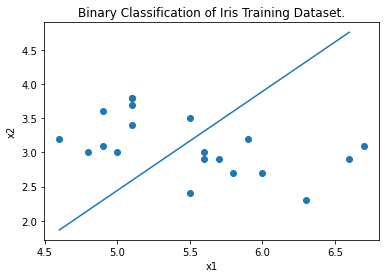

In [ ]:
# in order to plot the binary classification and draw the decision boundary we
# need to obtain the model parameters. 

b = binary_class.intercept_[0]
w1, w2 = binary_class.coef_[0].T

#now we need to calculate the intercept of the slope and intercept of the 
#decision boundary 
# 0 = w1*x + w2*y + b
# y = (-w1*x - b)/w2
#the equation of the decision boudary, y = mx + c, has the following values. 
m = -w1/w2
c = -b/w2

bc_decision_bound = [m,c]

#choose range of values of x for which to evaluate the decision boundary equation. 
test_xs = np.arange(min(x_train[:,0]),max(x_train[:,0]))

#plot the decision boundary
plt.plot(test_xs, (m*test_xs + c))
plt.scatter(x_train[:,0],x_train[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Binary Classification of Iris Training Dataset.")

plt.show()

#### Question 2:
Report the accuracy of your binary linear classifier on both the training and test sets. 

In [ ]:
training_confidence_bc = binary_class.score(x_train[:,:2], y_train)
print("The accuracy of the binary classification of the training set is : ", training_confidence_bc)

The accuracy of the binary classification of the training set is :  1.0


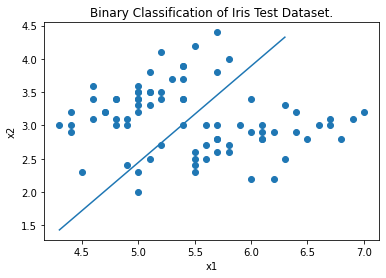

In [ ]:
#choose range of values of x for which to evaluate the decision boundary equation
#determined in previous question
test_xs = np.arange(min(x_test[:,0]),max(x_test[:,0]))
test_xs

#plot the decision boundary
plt.plot(test_xs, (m*test_xs + c))
plt.scatter(x_test[:,0],x_test[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Binary Classification of Iris Test Dataset.")

plt.show()

In [ ]:
test_confidence_bc = binary_class.score(x_test[:,:2], y_test)
print("The accuracy of the binary classification of the test set is :", test_confidence_bc)

The accuracy of the binary classification of the test set is : 0.9875


#### Question 3
Implement a linear SVM classifier on the first two dimensions. Plost the decision boundary of the classifier and it's margins. 

In [ ]:
from sklearn.svm import SVC
svm_class1 = SVC(C= 1000, kernel = 'linear')
svm_class1.fit(x_train[:,:2], y_train);

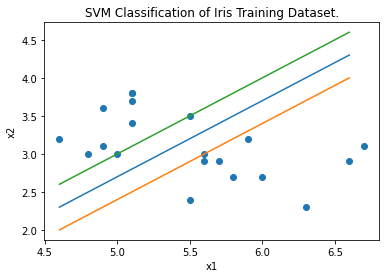

In [ ]:
#in order to draw svm classification we need to obtain the model parameters.
b = svm_class1.intercept_[0]
w1,w2 = svm_class1.coef_[0].T

#now we need to calculate the intercept of the slope and intercept of the 
#decision boundary 
# 0 = w1*x + w2*y + b
# y = (-w1*x - b)/w2
#the equation of the decision boudary, y = mx + c, has the following values. 
m = -w1/w2
c = -b/w2             #for decision boundary 

svm1_decision_bound = [m, c]

# we know that 1 = w1*x1 + w2*x2 + b is the equation of the positive margin and 
# that -1 = w1*x1 + w2*x2 + b is the equation of the negative margin. Noticing
# that only the intercept changes in these two equations, we manipulate them to 
# obtain the appropriate intercept of the margins, in order to then plot them on
# the graph. 

c_pos = (-b+1)/w2     #for upper/positive margin
c_neg = (-1-b)/w2     #for lower/negative margin

#choose range of values of x for which to evaluate the decision boundary equation. 
xs = np.arange(min(x_train[:,0]),max(x_train[:,0]))

#plot the decision boundary
plt.plot(xs, (m*xs + c))     #decision boundary
plt.plot(xs, (m*xs + c_pos)) #upper margin
plt.plot(xs, (m*xs + c_neg)) #lower margin

plt.scatter(x_train[:,0],x_train[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Classification of Iris Training Dataset.")

plt.show()

#### Question 4:
See submitted pdf document. 

#### Question 5:
Report the accuracy of your linear SVM classifier on both the training and test sets. 

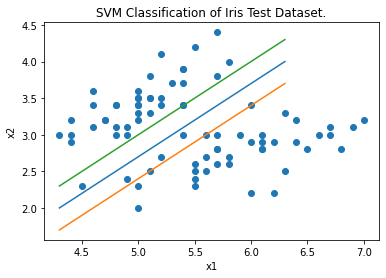

In [ ]:
#plot the svm classification model on test dataset. 
xs = np.arange(min(x_test[:,0]),max(x_test[:,0]))

#plot the decision boundary
plt.plot(xs, (m*xs + c))     #decision boundary
plt.plot(xs, (m*xs + c_pos)) #upper margin
plt.plot(xs, (m*xs + c_neg)) #lower margin

plt.scatter(x_test[:,0],x_test[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Classification of Iris Test Dataset.")

plt.show()

In [ ]:
#report the accuracy for training and testing
training_confidence_svm1 = svm_class1.score(x_train[:,:2], y_train)
print("The accuracy of the svm classification of the training set is : ", training_confidence_svm1)

test_confidence_svm1 = svm_class1.score(x_test[:,:2], y_test)
print("The accuracy of the svm classification of the test set is : ", test_confidence_svm1)

The accuracy of the svm classification of the training set is :  1.0
The accuracy of the svm classification of the test set is :  1.0


#### Question 6:
What is the value of the margin? 

In [ ]:
#From LECTURE VIDEO 11:
#margin = 2 / ||w||
#margin = 2 / (w^T * w)
#margin = 2 / sqrt((w1*w1 + w2*w2))

margin = 2 / np.sqrt((w1**2 + w2**2))

print("The value of the margin is :", margin)

The value of the margin is : 0.42430075463962524


#### Question 7:
See submitted pdf document. 

#### Question 8: 
Re-split the data into training and test sets with 0.4. 
Re-train the svm on new data. 
Compare decision boundary. 
Compare test accuracy. 

In [ ]:
x_train, x_test = train_test_split(x, test_size=0.4, random_state=0)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=0)

In [ ]:
svm_class2 = SVC(C = 1000, kernel = 'linear')
svm_class2.fit(x_train[:,:2], y_train);

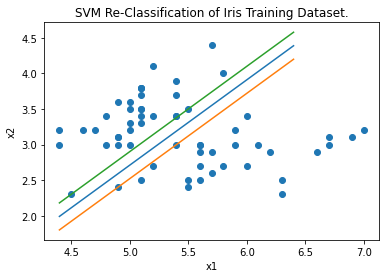

The accuracy of svm 2 for training set is : 1.0
The accuracy of svm 2 for test set is :  1.0


In [ ]:
#in order to draw svm classification we need to obtain the model parameters.
b = svm_class2.intercept_[0]
w1,w2 = svm_class2.coef_[0].T

#now we need to calculate the intercept of the slope and intercept of the 
#decision boundary 
# 0 = w1*x + w2*y + b
# y = (-w1*x - b)/w2
#the equation of the decision boudary, y = mx + c, has the following values. 
m = -w1/w2
c = -b/w2             #for decision boundary 

svm2_decision_bound = [m,c]

c_pos = (-b+1)/w2     #for upper/positive margin
c_neg = (-1-b)/w2     #for lower/negative margin

#choose range of values of x for which to evaluate the decision boundary equation. 
xs = np.arange(min(x_train[:,0]),max(x_train[:,0]))

#plot the decision boundary
plt.plot(xs, (m*xs + c))     #decision boundary
plt.plot(xs, (m*xs + c_pos)) #upper margin
plt.plot(xs, (m*xs + c_neg)) #lower margin

plt.scatter(x_train[:,0],x_train[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Re-Classification of Iris Training Dataset.")

plt.show()
training_confidence_svm2 = svm_class2.score(x_train[:,:2], y_train)
print("The accuracy of svm 2 for training set is :", training_confidence_svm2)

test_confidence_svm2 = svm_class2.score(x_test[:,:2], y_test)
print("The accuracy of svm 2 for test set is : ", test_confidence_svm2)

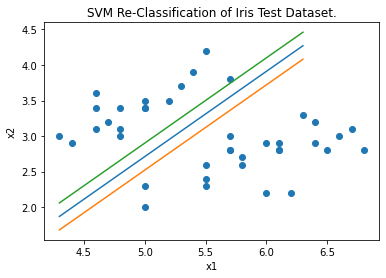

In [ ]:
test_xs = np.arange(min(x_test[:,0]),max(x_test[:,0]))

#plot the decision boundary
plt.plot(test_xs, (m*test_xs + c))     #decision boundary
plt.plot(test_xs, (m*test_xs + c_pos)) #upper margin
plt.plot(test_xs, (m*test_xs + c_neg)) #lower margin

plt.scatter(x_test[:,0],x_test[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Re-Classification of Iris Test Dataset.")

plt.show()

In [ ]:
print("for svm 1, the decision boundary equation is: y=",round(svm1_decision_bound[0],4),"*x +",round(svm1_decision_bound[1],4))
print("Test accuracy of SVM 1 :", test_confidence_svm1)

for svm 1, the decision boundary equation is: y= 0.9998 *x + -2.2988
Test accuracy of SVM 1 : 1.0


In [ ]:
print("for svm 2, the decision boundary equation is: y=",round(svm2_decision_bound[0],4),"*x +",round(svm2_decision_bound[1],4))
print("Test accuracy of SVM 2 :", test_confidence_svm2 )

for svm 2, the decision boundary equation is: y= 1.2 *x + -3.29
Test accuracy of SVM 2 : 1.0


Yes, the decision boundary and the test accuracy changed. 
In the first SVM model, 80% of the data went to testing and 20% went to training the model. In the second SVM model, 40% of the data went to testing and 60% went to training the model. This change in partition affected the decision boundary equation and the accuracy of the test dataset in the following ways. 

SVM 1 was trained on less data, so the boundary decision weights and bias (which were later transformed into slope and intercept) were more specific to the training data. As such, when running the model on the much larger and more varied test dataset, we should have obtained a less accurate score. When setting C=1, we obtained an accuracy score of 0.9875, but due to the fact that C=1000, we obtained an accuracy score of 1.0. 
 
SVM 2 was trained on more data, so the decision boundary weights and bias (which were later transformed into slope and intercept) were more general to the whole dataset. As such, when running the model on the remaining test dataset - which was smaller than the training dataset - we got an accuracy score of 1 when C=1 and when C=1000.

This implies that when the size of the training set exceeds that of the test set when first creating the SVM model, we are more likely to get a more accurate decision boundary. 

#### Question 9:
Do the binary classifier and SVM have the same decision boundaries? 

In [ ]:
print("For the binary linear classification, the equation of the decision boundary is:\ny=", round(bc_decision_bound[0],4),"*x +", round(bc_decision_bound[1],4))
print("For the SVM classification, the equation of the decision boundary is:\ny=", round(svm1_decision_bound[0],4),"*x +", round(svm1_decision_bound[1],4))

For the binary linear classification, the equation of the decision boundary is:
y= 1.4477 *x + -4.7943
For the SVM classification, the equation of the decision boundary is:
y= 0.9998 *x + -2.2988


As seen in the cell above, the binary linear classifier and the SVM classifier do not have the same decision boundaries.

#### Question 10: 

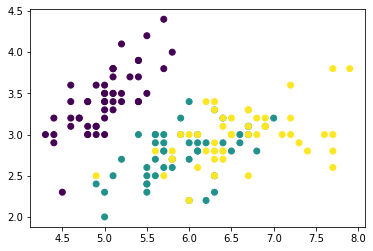

In [ ]:
x = d_iris.data[:,:2]
y = d_iris.target
plt.scatter(x[:,0],x[:,1], c=y)

Looking at this scatter plot of the whole data, limited to two features, we see that there are 3 linearly seperable classes within the entire dataset. 
There are two ways to deal with this dataset: 
1. Seperate it into 3 linearly classifiable datasets. 
2. Use polynomial classification of data. 

Both methodes will be done below. 

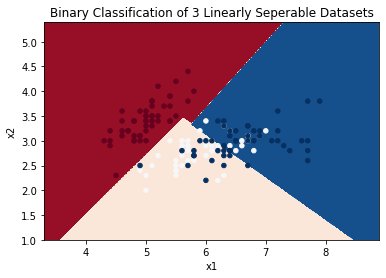

In [ ]:
x_train, x_test = train_test_split(x, test_size=0.4, random_state=0)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=0)

# For a linear solution where we divide the dataset into 3 linearly classifiable datasets

model = SVC(kernel = 'linear', C=1000)
model.fit(x_train, y_train)

#finding limits:
x1_min, x1_max = min(x[:,0])-1, max(x[:,0])+1
x2_min, x2_max = min(x[:,1])-1, max(x[:,1])+1

#deciding range of plot
step = 0.01
x_range, y_range = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))

#plot
height = model.predict(np.c_[x_range.ravel(), y_range.ravel()])
height = height.reshape(x_range.shape)

fig, ax = plt.subplots()
ax.contourf(x_range, y_range, height, cmap=plt.cm.RdBu)
ax.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdBu, s=20)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Binary Classification of 3 Linearly Seperable Datasets')

plt.show()

Text(0.5, 1.0, 'Polynomial Classification of Iris Dataset')

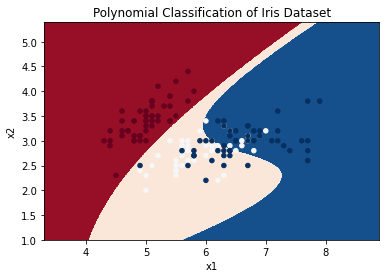

In [ ]:
# for polynomial solution
x = d_iris.data[:,:2]
y = d_iris.target
x0 = x[:,0]
x1 = x[:,1]

xtrain, xtest = train_test_split(x, test_size=0.4, random_state=0)
ytrain, ytest = train_test_split(y, test_size=0.4, random_state=0)

model = SVC(C=1000, kernel='poly')
model.fit(xtrain,ytrain)

x1_min, x1_max = min(x[:,0])-1, max(x[:,0])+1
x2_min, x2_max = min(x[:,1])-1, max(x[:,1])+1

x1range, x2range = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

result = model.predict(np.c_[x1range.ravel(), x2range.ravel()]).reshape(x1range.shape)

fig, ax = plt.subplots()
ax.contourf(x1range, x2range, result, cmap=plt.cm.RdBu)
ax.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdBu, s=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Polynomial Classification of Iris Dataset')